In [1]:
import pandas as pd

pd.options.display.max_rows = 10
pd.options.display.max_columns = 1000

from sklearn import *
import numpy as np

from mlxtend.plotting import plot_confusion_matrix

/Users/rakesh/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/rakesh/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/rakesh/anaconda2/lib/python2.7/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0

In [3]:
df = pd.read_csv("../data/credit-default.csv")

In [4]:
df

checking_balance  months_loan_duration credit_history     purpose  amount  \
0             < 0 DM                     6       critical    radio/tv    1169   
1         1 - 200 DM                    48         repaid    radio/tv    5951   
2            unknown                    12       critical   education    2096   
3             < 0 DM                    42         repaid   furniture    7882   
4             < 0 DM                    24        delayed   car (new)    4870   
..               ...                   ...            ...         ...     ...   
995          unknown                    12         repaid   furniture    1736   
996           < 0 DM                    30         repaid  car (used)    3857   
997          unknown                    12         repaid    radio/tv     804   
998           < 0 DM                    45         repaid    radio/tv    1845   
999       1 - 200 DM                    45       critical  car (used)    4576   

    savings_balance employment_length  installment_rate personal_status  \
0           unknown           > 7 yrs                 4     single male   
1          < 100 DM         1 - 4 yrs                 2          female   
2          < 100 DM         4 - 7 yrs                 2     single male   
3          < 100 DM         4 - 7 yrs                 2     single male   
4          < 100 DM         1 - 4 yrs                 3     single male   
..              ...               ...               ...             ...   
995        < 100 DM         4 - 7 yrs                 3          female   
996        < 100 DM         1 - 4 yrs                 4   divorced male   
997        < 100 DM           > 7 yrs                 4     single male   
998        < 100 DM         1 - 4 yrs                 4     single male   
999    101 - 500 DM        unemployed                 3     single male   

    other_debtors  residence_history                  property  age  \
0            none                  4               real estate   67   
1            none                  2               real estate   22   
2            none                  3               real estate   49   
3       guarantor                  4  building society savings   45   
4            none                  4              unknown/none   53   
..            ...                ...                       ...  ...   
995          none                  4               real estate   31   
996          none                  4  building society savings   40   
997          none                  4                     other   38   
998          none                  4              unknown/none   23   
999          none                  4                     other   27   

    installment_plan   housing  existing_credits  default  dependents  \
0               none       own                 2        1           1   
1               none       own                 1        2           1   
2               none       own                 1        1           2   
3               none  for free                 1        1           2   
4               none  for free                 2        2           2   
..               ...       ...               ...      ...         ...   
995             none       own                 1        1           1   
996             none       own                 1        1           1   
997             none       own                 1        1           1   
998             none  for free                 1        2           1   
999             none       own                 1        1           1   

    telephone foreign_worker                      job  
0         yes            yes         skilled employee  
1        none            yes         skilled employee  
2        none            yes       unskilled resident  
3        none            yes         skilled employee  
4        none            yes         skilled employee  
..        ...            ...                      ...  
995     

In [33]:
df.default.value_counts()
df.columns

Index([u'checking_balance', u'months_loan_duration', u'credit_history',
       u'purpose', u'amount', u'savings_balance', u'employment_length',
       u'installment_rate', u'personal_status', u'other_debtors',
       u'residence_history', u'property', u'age', u'installment_plan',
       u'housing', u'existing_credits', u'default', u'dependents',
       u'telephone', u'foreign_worker', u'job'],
      dtype='object')

In [44]:
target = "default"
X = df.copy()
del X[target]

X = pd.get_dummies(X, drop_first = True)
columns = X.columns

y = np.where(df[target] == 2, 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values.astype(np.float64)
                            , y, test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

In [45]:
y_train

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,

In [46]:
y_train_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,

(<matplotlib.figure.Figure at 0x115941150>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1159653d0>)

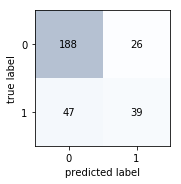

In [47]:
cf = metrics.confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cf)

"""
------|------|
|     |      |
|  TP |  FN  |
|     |      |
------|------|
|     |      |  
|  FP |  TN  |
|     |      |
------|------|

TP: True Positive
TN: True Negative

FN: False Negative
FP: False Positive

Middle line is the barrier
"""

In [48]:
metrics.accuracy_score(y_test, y_test_pred)

0.7566666666666667

In [49]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]

In [50]:
y_test_prob

array([0.39057174, 0.93703644, 0.20657021, 0.61518513, 0.84263414,
       0.64645627, 0.4494791 , 0.2594988 , 0.07077182, 0.213155  ,
       0.82216781, 0.47922995, 0.10628614, 0.04927787, 0.37051886,
       0.40154836, 0.02384756, 0.08634611, 0.03673578, 0.8716225 ,
       0.17347053, 0.68418377, 0.08289624, 0.08335264, 0.20201892,
       0.14277761, 0.11199784, 0.22723868, 0.08939474, 0.8914261 ,
       0.3687219 , 0.03176349, 0.45735348, 0.21773117, 0.30430631,
       0.92027889, 0.24340843, 0.4961519 , 0.1303132 , 0.0819819 ,
       0.09401154, 0.58658622, 0.009761  , 0.49218681, 0.04921602,
       0.03568655, 0.10812248, 0.27239898, 0.0533497 , 0.10149276,
       0.22215534, 0.45281983, 0.59676824, 0.51534091, 0.22166303,
       0.1454495 , 0.58814834, 0.65672602, 0.02847046, 0.59138439,
       0.43687783, 0.07374869, 0.52003891, 0.01800186, 0.56258666,
       0.25013105, 0.18103621, 0.05744698, 0.8604261 , 0.93227089,
       0.16641523, 0.22303058, 0.03080095, 0.59138775, 0.14556

('accuracy:', 0.7566666666666667, '\n precision:', 0.6, '\n recall:', 0.45348837209302323, '\n f1_score:', 0.5165562913907285)


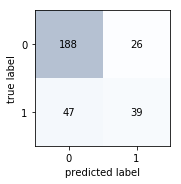

In [52]:
y_test_pred = np.where(y_test_prob > 0.5, 1, 0) #0.5 is the prob threshold
cf = metrics.confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cf)
print("accuracy:", metrics.accuracy_score(y_test, y_test_pred),
     "\n precision:", metrics.precision_score(y_test, y_test_pred),
     "\n recall:", metrics.recall_score(y_test, y_test_pred),
     "\n f1_score:", metrics.f1_score(y_test, y_test_pred))

('accuracy:', 0.7466666666666667, '\nprecision:', 0.75, '\nrecall:', 0.1744186046511628, '\nf1_score:', 0.28301886792452835)


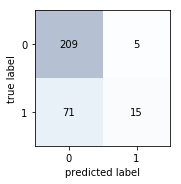

In [53]:
y_test_pred = np.where(y_test_prob > 0.8, 1, 0) #0.5 is the prob threshold
cf = metrics.confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cf)
print("accuracy:", metrics.accuracy_score(y_test, y_test_pred),
     "\nprecision:", metrics.precision_score(y_test, y_test_pred),
     "\nrecall:", metrics.recall_score(y_test, y_test_pred),
     "\nf1_score:", metrics.f1_score(y_test, y_test_pred))

('accuracy:', 0.6466666666666666, '\nprecision:', 0.43333333333333335, '\nrecall:', 0.7558139534883721, '\nf1_score:', 0.5508474576271187)


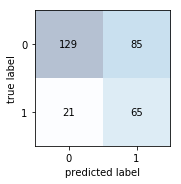

In [54]:
y_test_pred = np.where(y_test_prob > 0.2, 1, 0) #0.5 is the prob threshold
cf = metrics.confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cf)
print("accuracy:", metrics.accuracy_score(y_test, y_test_pred),
     "\nprecision:", metrics.precision_score(y_test, y_test_pred),
     "\nrecall:", metrics.recall_score(y_test, y_test_pred),
     "\nf1_score:", metrics.f1_score(y_test, y_test_pred))

In [55]:
pd.Series(y_train).value_counts()/len(y_train)

0    0.694286
1    0.305714
dtype: float64

In [56]:
import matplotlib.pyplot as plt

Text(0,0.5,u'TPR')

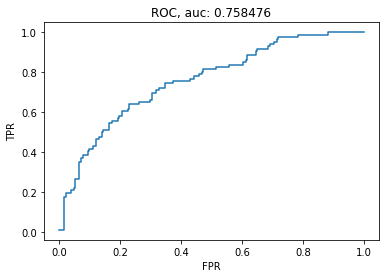

In [57]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.title("ROC, auc: %f" % metrics.auc(fpr, tpr))
plt.xlabel("FPR")
plt.ylabel("TPR")